In [1]:
import pandas as pd

## Read-in dataset

In [2]:
df = pd.read_csv('../Data/GI_det.csv')

In [3]:
df.head(10)

,Lower tier local authorities Code,Lower tier local authorities,Gender identity (8 categories) Code,Gender identity (8 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,70588
2,E06000001,Hartlepool,2,Gender identity different from sex registered ...,167
3,E06000001,Hartlepool,3,Trans woman,49
4,E06000001,Hartlepool,4,Trans man,51
5,E06000001,Hartlepool,5,Non-binary,33
6,E06000001,Hartlepool,6,All other gender identities,21
7,E06000001,Hartlepool,7,Not answered,3777
8,E06000002,Middlesbrough,-8,Does not apply,0
9,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,106009


## Data Cleaning

* rename columns
* remove 'Does not apply' from gender identity category
* rename some values in gender identity category so they are not as wordy

In [4]:
df = df.rename(columns = {'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Gender identity (8 categories) Code': 'GI_code', 'Gender identity (8 categories)': 'GI_cat'})

In [5]:
df = df[df.GI_cat != 'Does not apply']

In [6]:
df['GI_cat'] = df['GI_cat'].replace({'Gender identity the same as sex registered at birth': 'Gender identity the same as sex', 'Gender identity different from sex registered at birth but no specific identity given': 'Gender identity different from sex'})

In [7]:
df.head(10)

,LA_code,LA_name,GI_code,GI_cat,Observation
1,E06000001,Hartlepool,1,Gender identity the same as sex,70588
2,E06000001,Hartlepool,2,Gender identity different from sex,167
3,E06000001,Hartlepool,3,Trans woman,49
4,E06000001,Hartlepool,4,Trans man,51
5,E06000001,Hartlepool,5,Non-binary,33
6,E06000001,Hartlepool,6,All other gender identities,21
7,E06000001,Hartlepool,7,Not answered,3777
9,E06000002,Middlesbrough,1,Gender identity the same as sex,106009
10,E06000002,Middlesbrough,2,Gender identity different from sex,496
11,E06000002,Middlesbrough,3,Trans woman,141


## Data Pre-processing

Now, let's use our 'Observation' column to calculate % of gender identity categories for each Local Authority

In [8]:
df['Percentage'] = ''

for i in df.LA_name.unique():
    b = df[df.LA_name == i]
    perc = b.Observation / b.Observation.sum() * 100
    df.loc[b.index, 'Percentage'] = round(perc,2)

In [9]:
df.head(10)

,LA_code,LA_name,GI_code,GI_cat,Observation,Percentage
1,E06000001,Hartlepool,1,Gender identity the same as sex,70588,94.51
2,E06000001,Hartlepool,2,Gender identity different from sex,167,0.22
3,E06000001,Hartlepool,3,Trans woman,49,0.07
4,E06000001,Hartlepool,4,Trans man,51,0.07
5,E06000001,Hartlepool,5,Non-binary,33,0.04
6,E06000001,Hartlepool,6,All other gender identities,21,0.03
7,E06000001,Hartlepool,7,Not answered,3777,5.06
9,E06000002,Middlesbrough,1,Gender identity the same as sex,106009,93.04
10,E06000002,Middlesbrough,2,Gender identity different from sex,496,0.44
11,E06000002,Middlesbrough,3,Trans woman,141,0.12


## Read-in shapefile

In [10]:
import geopandas as gpd

In [11]:
gdf = gpd.read_file('../Shapefiles/LADs/LAD_MAY_2022_UK_BFE_V3.shp')

In [12]:
gdf.head()

,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,447160,531474,-1.27018,54.6761,2efc9848-300e-4ef3-a36e-58d6856b9817,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,451141,516887,-1.21099,54.5447,6d66b015-1f67-40f6-b239-15911fa03834,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.5675,a5a6513f-916e-4769-bed2-cd019d18719a,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.5569,14e8450b-7e7c-479a-a335-095ac2d9a701,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,428029,515648,-1.56835,54.5353,2f212ecf-daf5-4171-b9c6-825c0d33e5af,"POLYGON ((423496.602 524724.299, 423497.204 52..."


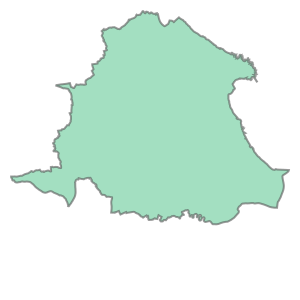

In [13]:
gdf.geometry[0]

In [14]:
gdf.geometry.geom_type.value_counts()

Polygon         338
MultiPolygon     36
Name: count, dtype: int64

## Cleaning gdf

* rename columns to match 'df'
* get rid of redundant Local Authorities

In [15]:
gdf = gdf.rename(columns = {'LAD22CD': 'LA_code', 'LAD22NM' : 'LA_name'})

In [16]:
gdf = gdf[gdf['LA_code'].isin(df.LA_code.unique())].reset_index(drop = True)

In [17]:
gdf.head(5)

,LA_code,LA_name,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,447160,531474,-1.27018,54.6761,2efc9848-300e-4ef3-a36e-58d6856b9817,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,451141,516887,-1.21099,54.5447,6d66b015-1f67-40f6-b239-15911fa03834,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.5675,a5a6513f-916e-4769-bed2-cd019d18719a,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.5569,14e8450b-7e7c-479a-a335-095ac2d9a701,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,428029,515648,-1.56835,54.5353,2f212ecf-daf5-4171-b9c6-825c0d33e5af,"POLYGON ((423496.602 524724.299, 423497.204 52..."


In [18]:
gdf['LA_name'] = gdf['LA_name'].replace({'Bristol, City of': 'Bristol', 'Kingston upon Hull, City of': 'Kingston upon Hull', 'Herefordshire, County of': 'Herefordshire'})

In [19]:
gdf.head(5)

,LA_code,LA_name,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,447160,531474,-1.27018,54.6761,2efc9848-300e-4ef3-a36e-58d6856b9817,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,451141,516887,-1.21099,54.5447,6d66b015-1f67-40f6-b239-15911fa03834,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.5675,a5a6513f-916e-4769-bed2-cd019d18719a,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.5569,14e8450b-7e7c-479a-a335-095ac2d9a701,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,428029,515648,-1.56835,54.5353,2f212ecf-daf5-4171-b9c6-825c0d33e5af,"POLYGON ((423496.602 524724.299, 423497.204 52..."


In [20]:
tm = df[df.GI_cat == 'Trans man'].reset_index(drop = True)

In [21]:
tm['Percentage'] = pd.to_numeric(tm['Percentage'])

In [22]:
tm

,LA_code,LA_name,GI_code,GI_cat,Observation,Percentage
0,E06000001,Hartlepool,4,Trans man,51,0.07
1,E06000002,Middlesbrough,4,Trans man,174,0.15
2,E06000003,Redcar and Cleveland,4,Trans man,98,0.09
3,E06000004,Stockton-on-Tees,4,Trans man,122,0.08
4,E06000005,Darlington,4,Trans man,71,0.08
...,...,...,...,...,...,...
326,W06000020,Torfaen,4,Trans man,51,0.07
327,W06000021,Monmouthshire,4,Trans man,32,0.04
328,W06000022,Newport,4,Trans man,130,0.10
329,W06000023,Powys,4,Trans man,54,0.05


In [23]:
gdf['Percentage'] = tm['Percentage']

In [24]:
geojson = gdf.geometry.to_json()

In [25]:
gdf = gdf.to_crs(epsg=4326)


In [26]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
gdf.to_file('Shapefiles/my_geodataframe.shp', driver='ESRI Shapefile')


In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(gdf, 
                            geojson=geojson, 
                            locations=gdf.index, 
                            color='Percentage',
                            color_continuous_scale=px.colors.sequential.Viridis,
                            center={"lat": gdf.geometry.centroid.y.mean(), 
                                    "lon": gdf.geometry.centroid.x.mean()},
                            mapbox_style="carto-positron",
                            zoom=5)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# Before merge

In [ ]:
merged = pd.merge(df, gdf, on = ['LA_code', 'LA_name'], how = 'left')

In [ ]:
merged.head(10)

In [ ]:
tm = merged[merged.GI_cat == 'Trans man']

In [ ]:
tm.shape

In [ ]:
tm

In [ ]:
tm[:3]

In [ ]:
tm = tm[:3]

In [ ]:
tm = gpd.GeoDataFrame(tm, geometry='geometry')

In [ ]:
import plotly.express as px
import json
# Drop unnecessary columns
# tm = tm.drop(['BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID'], axis=1)

# Simplify the geometries
tm['geometry'] = tm.geometry.simplify(tolerance=10, preserve_topology=True)

# Convert to GeoJSON and inspect the size and contents
geojson = tm.geometry.to_json()
print(f"Size of GeoJSON: {len(geojson)} bytes")

# Write GeoJSON to a file to inspect its contents
with open('geometry.geojson', 'w') as f:
    f.write(geojson)

In [ ]:
tm['Percentage'] = pd.to_numeric(tm['Percentage'])

In [ ]:
tm.index

In [ ]:
tm.reset_index(inplace=True)

In [ ]:
fig = px.choropleth(tm, geojson = geojson,
                    locations = tm.index,
                    color = 'Percentage',
                    color_continuous_scale = "Viridis",
                    range_color=(0,100))


fig.show()